## Schellingův model segregace (2D)
2D prostředí je zde zastoupeno mřížkou, každý agent má tedy osm sousedů. Volitelnými parametry jsou AGENT_TOLERANCE (tolerance agenta vůči odlišným sousedům), EMPTY_RATIO (poměr prázdných buněk) a GRID_SIZE (velikost "světa").


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Vytvoření počáteční reprezentace v rámci 2D mřížky
def create_grid(size, empty_ratio):
    total_cells = size * size
    num_empty = int(total_cells * empty_ratio)
    num_type1 = (total_cells - num_empty) // 2
    num_type2 = total_cells - num_empty - num_type1
    # Seznam buněk (0 = prázdné, 1 = typ 1, 2 = typ 2)
    cells = [0]*num_empty + [1]*num_type1 + [2]*num_type2
    random.shuffle(cells)
    return np.array(cells).reshape((size, size))

# Kontrola spokojenosti agenta
def is_happy(grid, x, y):
    agent = grid[x, y]
    if agent == 0:
        return True  # prázdné místo je vždy "spokojené"

    neighbors = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1]:
                neighbor = grid[nx, ny]
                if neighbor != 0:
                    neighbors.append(neighbor)

    if not neighbors:
        return True  # bez sousedů = neutrální

    same = sum(1 for n in neighbors if n == agent)
    ratio = same / len(neighbors)
    return ratio >= AGENT_TOLERANCE

# Funkce step – aplikace jednoho kroku modelu
def step(grid):
    unhappy_agents = []
    empty_spaces = list(zip(*np.where(grid == 0)))

    # Nalzení nespokojených agentů
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x, y] != 0 and not is_happy(grid, x, y):
                unhappy_agents.append((x, y))

    random.shuffle(unhappy_agents)
    new_grid = grid.copy()

    # Každý nespokojený agent se přemístí
    for x, y in unhappy_agents:
        if not empty_spaces:
            break
        new_x, new_y = empty_spaces.pop(random.randrange(len(empty_spaces)))
        new_grid[new_x, new_y] = grid[x, y]
        new_grid[x, y] = 0

    return new_grid

# Funkce plot - vykreslení aktuální sitace v reprezentaci (mřížce)
def plot(grid):
    plt.imshow(grid, cmap=plt.cm.get_cmap('Accent', 3))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

# Výpočet počtu spokojených agentů
def count_happy(grid):
    count = 0
    total = 0
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x, y] != 0:
                total += 1
                if is_happy(grid, x, y):
                    count += 1
    return count, total


### Simulace

Generace 0: 261/320 spokojených (82%)


C:\Users\ivato\AppData\Local\Temp\ipykernel_15620\1451086850.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(grid, cmap=plt.cm.get_cmap('Accent', 3))


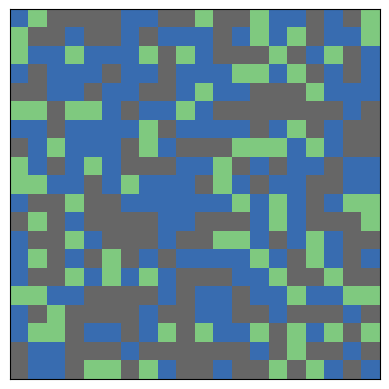

Generace 1: 290/320 spokojených (91%)


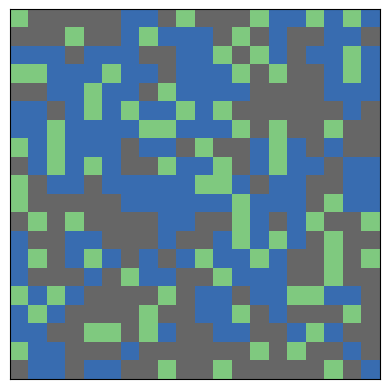

Generace 2: 300/320 spokojených (94%)


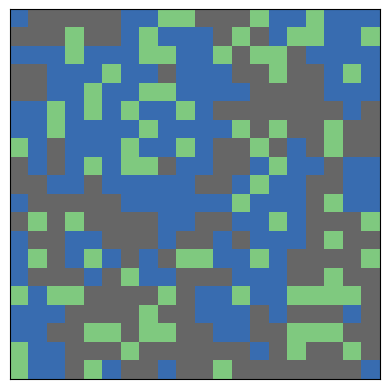

Generace 3: 305/320 spokojených (95%)


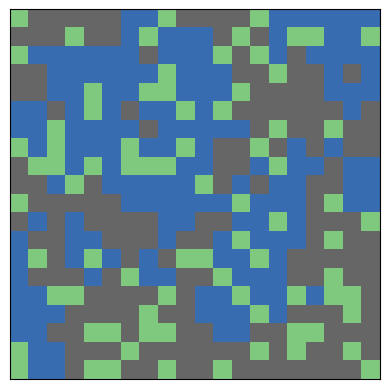

Generace 4: 315/320 spokojených (98%)


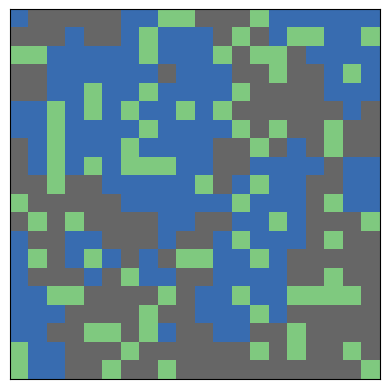

Generace 5: 318/320 spokojených (99%)


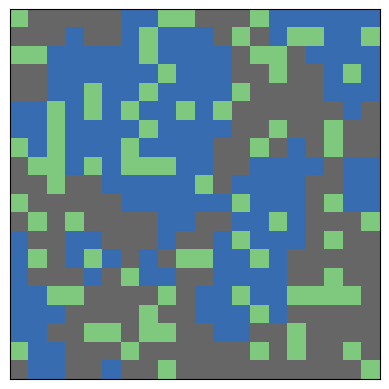

Generace 6: 319/320 spokojených (100%)


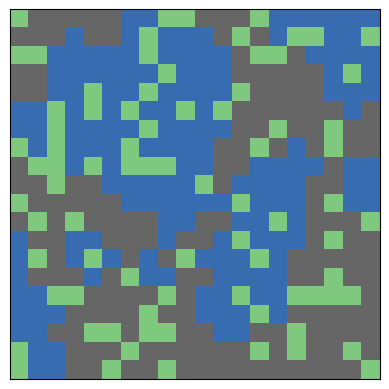

Generace 7: 319/320 spokojených (100%)


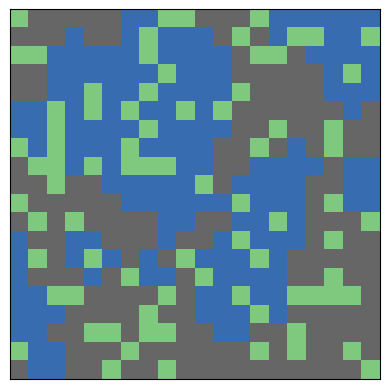

Generace 8: 319/320 spokojených (100%)


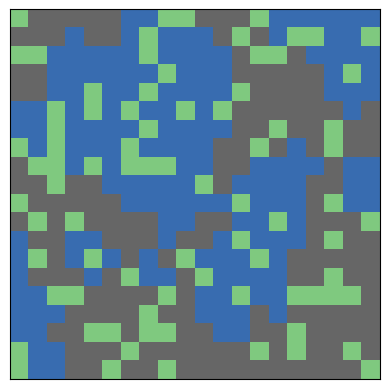

Generace 9: 319/320 spokojených (100%)


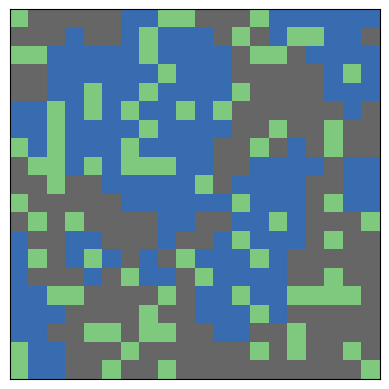

Generace 10: 320/320 spokojených (100%)


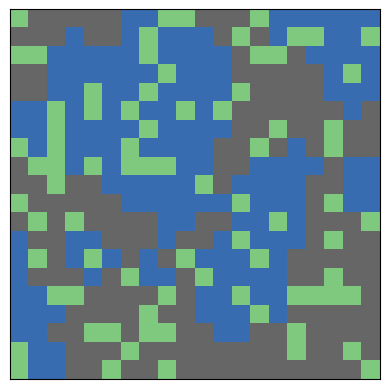

In [2]:
# Volitelné parametry modelu
GRID_SIZE = 20         # a × a
EMPTY_RATIO = 0.2      # poměr prázdných buněk
AGENT_TOLERANCE = 0.3  # míra tolerance agenta vůči odlišným sousedům

# Inicializace
grid = create_grid(GRID_SIZE, EMPTY_RATIO)

happy_counts = []
generations = 0

# Simulace dokud existují nespokojení
while True:
    happy, total = count_happy(grid)
    happy_counts.append(happy)
    print(f"Generace {generations}: {happy}/{total} spokojených ({happy/total:.0%})")
    plot(grid)

    new_grid = step(grid)
    generations += 1
    if np.array_equal(grid, new_grid):  # žádný další pohyb
        break
    grid = new_grid


### Vývoj spokojenosti v čase

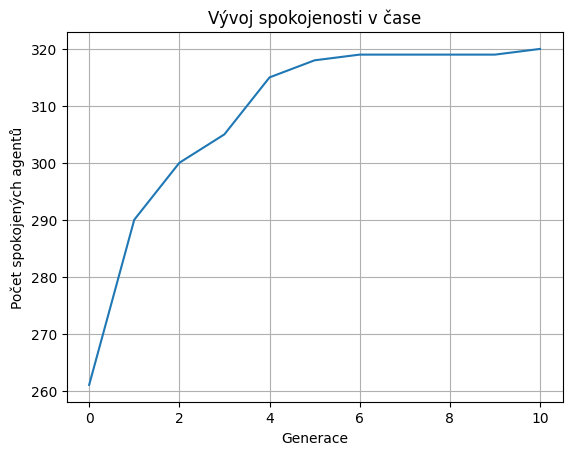

In [3]:
plt.plot(happy_counts)
plt.xlabel("Generace")
plt.ylabel("Počet spokojených agentů")
plt.title("Vývoj spokojenosti v čase")
plt.grid()
plt.show()
